# Lending Club Data - Auto ML on H2O-3 Open Source

**Lending Club** publishes loan data periodically for public use. The anonymized data has information on different loans issued, such as loan_id, loan_amount, what loan grade, credit score etc., and also a **loan_status** variable that indicates whether a loan was _Fully Paid_ or _Charged Off_ (written off because of default).

This python notebook tutorial shows:
- Kick off Automatic Machine Learning with H2O3 with the training/test prepared in the previous tutorial
- Show Variable Importance
- Score on test data
- Show model performance on test data

Prerequisites:
- A H2O3 instance available running on-prem or cloud. If not, you can start a local instance
- Get the latest h2o python library by running "!pip install h2o" or "!conda install h2o" etc.,

In [25]:
# Replace below with settings in your environment before you run the notebook

h2o3_ip = "<ip address of the H2O-3 cluster that's running>" 


## Create or Connect to H2O3 instance 


In [13]:
import h2o
from h2o.automl import H2OAutoML

# If you want to create and run a local instance instead, (where Jupyter kernel is running) just uncomment below:
#h2o.init()
# and comment the code below:

h2o.init(ip=h2o3_ip,strict_version_check=False)

# If things break, uninstall and install the h2o library and you set strick_version_check to True to see 
# what's going on

Checking whether there is an H2O instance running at http://ec2-3-92-24-170.compute-1.amazonaws.com:54321 . connected.


H2O cluster uptime:,29 mins 28 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,12 days
H2O cluster name:,Puddle
H2O cluster total nodes:,1
H2O cluster free memory:,125.5 Gb
H2O cluster total cores:,40
H2O cluster allowed cores:,40
H2O cluster status:,"locked, healthy"


### Upload the Train and Test data to H2O-3 Cluster

In [14]:
import os

# These two CSV files were created in the previous section

train_path = os.getcwd()+"/train_lc.csv.zip"
test_path = os.getcwd()+ "/test_lc.csv.zip"

train = h2o.load_dataset(train_path)
test = h2o.load_dataset(test_path)



Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
train.describe()


Rows:178481
Cols:125




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method
type,int,int,int,int,int,enum,real,real,enum,enum,enum,enum,enum,real,enum,time,enum,enum,int,string,enum,enum,enum,enum,real,int,time,int,int,int,int,int,int,real,int,enum,int,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,enum,enum,enum,int,real,time,time,time,int,int,enum,real,real,real,enum
mins,NaN,NaN,1000.0,1000.0,950.0,,0.06,23.36,,,,,,3000.0,,1388534400000.0,,,NaN,NaN,,,,,0.0,0.0,-694310400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,0.0,0.0,1.0,,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,3.0,1.47,1485907200000.0,1491004800000.0,1485907200000.0,3.0,0.0,,4.41,174.15,0.04,
mean,0.0,0.0,14587.218247320443,14587.218247320443,14582.372353359726,,0.1366922182193067,440.1597257971444,,,,,,74436.02622822594,,1403555741511.9788,,,0.0,NaN,,,,,17.954448876911364,0.3412352015060426,880572978645.344,0.7663784940693942,33.539753886153015,70.8516495521084,11.642113166107288,0.2262313635625084,16227.945148223094,0.5534058849249949,26.011704327071186,,0.015183689020119788,42.409471135866994,1.0,,0.0,0.0,0.0,0.005653262812288142,285.9793199276114,138285.01924574593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30432.881707296532,0.0,0.0,0.0,4.435547761386366,13283.234990895115,8467.5100749036,64.32411005161505,0.010667802175021428,11.017660143096464,128.05217597464934,184.74656125862077,12.905799496865223,7.897479283509171,1.8422072937735658,24.198982939632547,39.776503021948805,6.876508843671467,35.59148962681454,0.5088216672923164,3.66645189123772,5.774020764114923,4.6364038749222605,8.549711173738375,8.575024792554903,8.2597979616

### Run Auto ML on training data set


In [16]:
# Identify predictors and response
x = train.columns
y = "loan_status"
x.remove(y)


# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML 
aml = H2OAutoML(project_name='LC', 
                max_models=50,         # 50 base models
                balance_classes=True,  # Doing smart Class imbalance sampling
                max_runtime_secs=7200, # 2 hours
                seed=1234)             # Set a seed for reproducability
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### Look at AutoML Leaderboard

In [17]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190413_151610,0.725138,0.430526,0.478656,0.368002,0.135425
StackedEnsemble_BestOfFamily_AutoML_20190413_151610,0.724612,0.430702,0.482744,0.368082,0.135484
XGBoost_grid_1_AutoML_20190413_151610_model_3,0.721666,0.429575,0.47638,0.367936,0.135377
XGBoost_1_AutoML_20190413_151610,0.720381,0.430149,0.482759,0.368202,0.135573
XGBoost_grid_1_AutoML_20190413_151610_model_5,0.719408,0.430658,0.488407,0.36838,0.135704
XGBoost_grid_1_AutoML_20190413_151610_model_4,0.718797,0.431052,0.491495,0.368638,0.135894
XGBoost_grid_1_AutoML_20190413_151610_model_7,0.71844,0.431414,0.486992,0.368638,0.135894
DeepLearning_1_AutoML_20190413_151610,0.717355,0.432476,0.495511,0.36922,0.136324
XGBoost_3_AutoML_20190413_151610,0.717336,0.43204,0.487547,0.368886,0.136077
GLM_grid_1_AutoML_20190413_151610_model_1,0.716803,0.432327,0.489943,0.368991,0.136155


### What's the composition of the StackedEnsemble Leader model ?

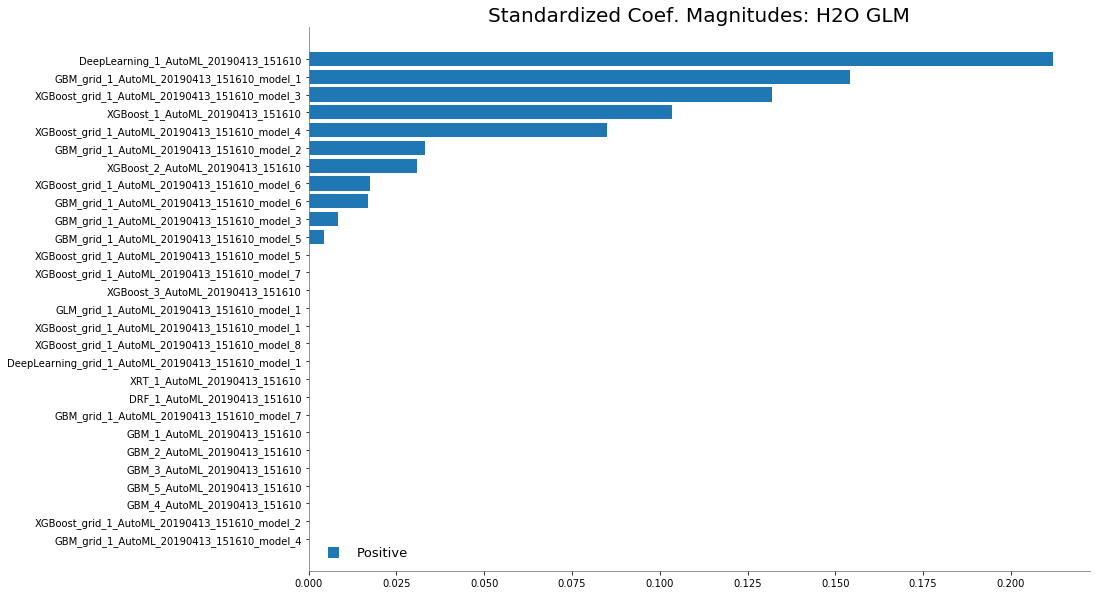

In [18]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

In [19]:
# You can see above H2O ML ran XGBoost, GLM, XRT, GBM, Deep Learning, DRF etc., did hyperparameter search and then
# combined the top N best algorithms to create a final stack ensemble

### Important Features and Attributes of the top GLM Model on the AutoML leaderboard
#### What's different about a  Loan getting "Fully Paid" or "Charged Off" ?

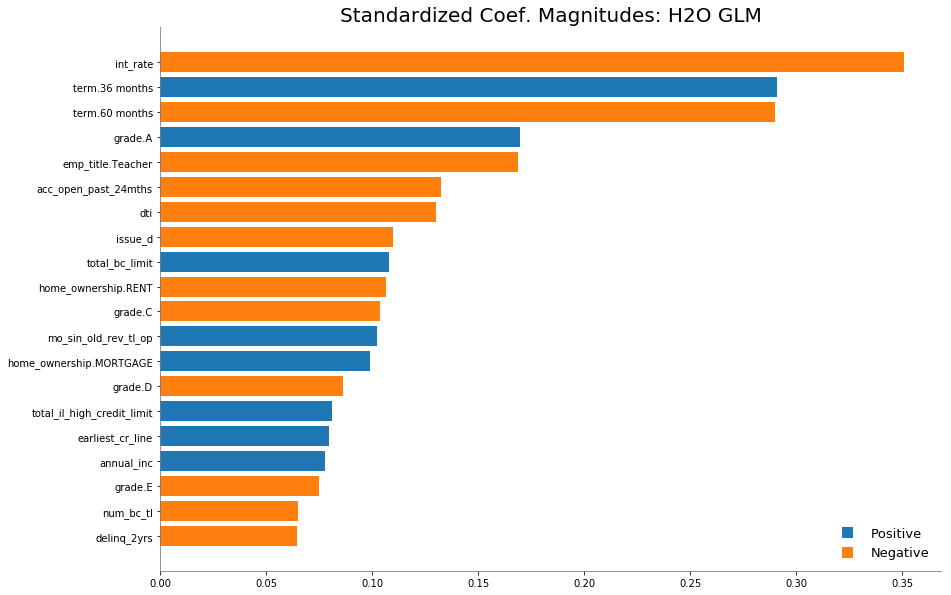

In [20]:
# Get the GLM leader from above for looking at feature importance
df = lb.as_data_frame()
for m in df['model_id'].tolist():
    if (m.find("GLM") != -1):
        glm_leader_model = m
        break
        
h2o.get_model(glm_leader_model).std_coef_plot(num_of_features=20)

### Insights ...
The standardized Coef. Magnitudes of the GLM model in the leaderboard gives us a sense of what's different about a Loan Getting Paid in Full vs Loan getting Charged Off/Defaulted. The features/attributes in blue are the positive reasons (Length of the bar is the order of importance) why the Loan is getting Paid in Full vs the one in the Orange which can be attributed to Loan defaulting. In summary:

##### 7 Factors why Loan might getting Fully Paid - in the order of importance (Looking only at the Blue bars):

1. **term.36_months** - If the Loan term is shorter, like 3 years
2. **grade.A** - If the Loan Grade is "A"
3. **total_bc_limit** - If the total bank card credit Limit is high
4. **mo_sub_old_rev_tl_op** - If a lot of months since most recent revolving account opened
5. **home_ownership.MORTGAGE** - Whether a Home Mortgage Account was opened earlier by customer
6. **total_il_high_credit_limit** - Total installment high credit/credit limit (Kind of %payments to total credit limit)
7. **earliest_cr_line** - When the first credit line was opened


##### 7 Factors why Loan might be Charged Off - in the order of importance (Looking only at the Orange bars):
1. **int_rate** - If Interest Rate is high
2. **term.60_months** - If the Loan term is longer, like 5 years
3. **emp_title.<EMP_TITLE>** - 
4. **acc_open_past_24_mnts** - Correlated to the # of accounts opened in past 24 months
5. **dti** - Debt to Income ratio is high
6. **issue_d** - month/year which a loan was issued
7. **home_ownership.RENT** - Whether a customer was renting an apartment.

### Variable Importance Insights from each model in the AutoML Leaderboard

Note that each algorithm in the leaderboard is somewhat showing the same variables as the Top N important ones. That's telling us each algorithm generalizes to the same factors more or less !

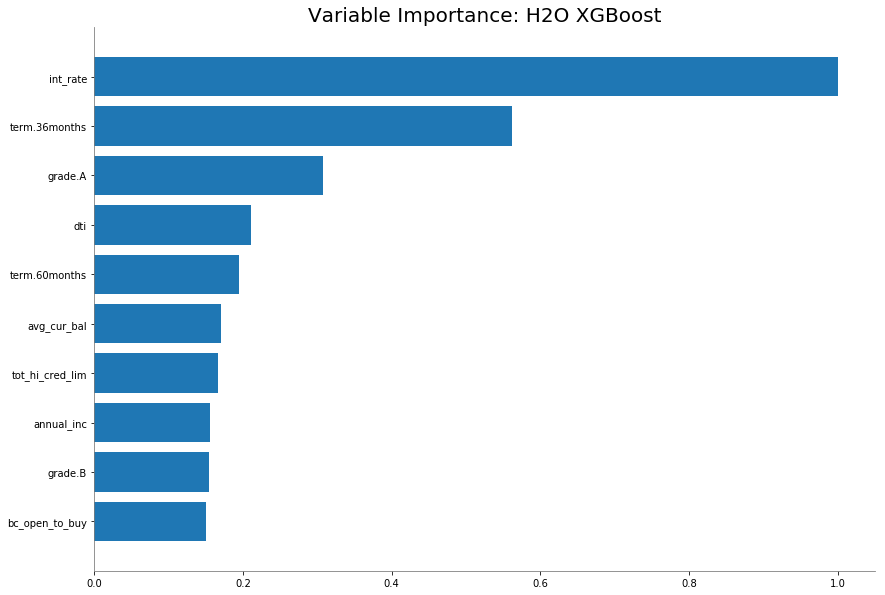

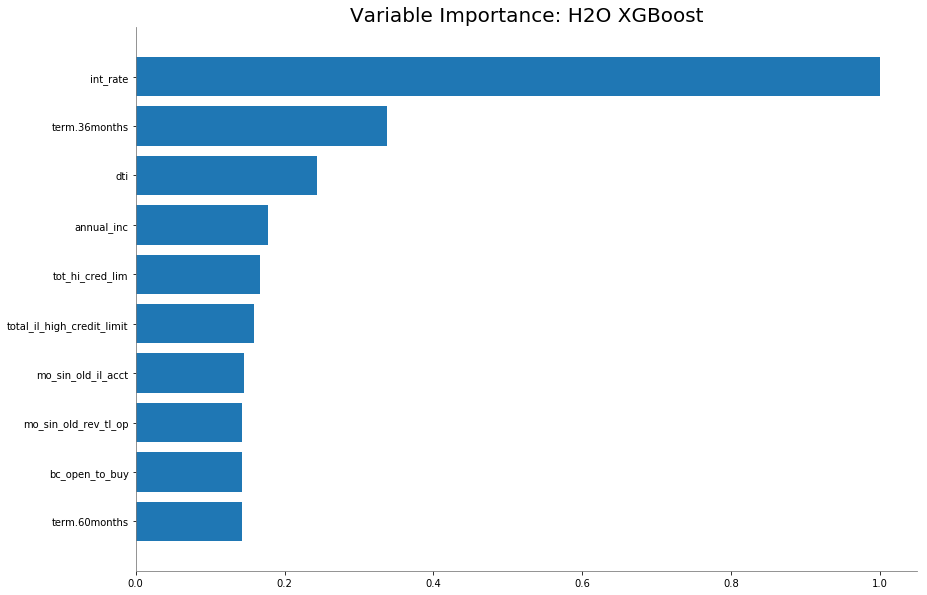

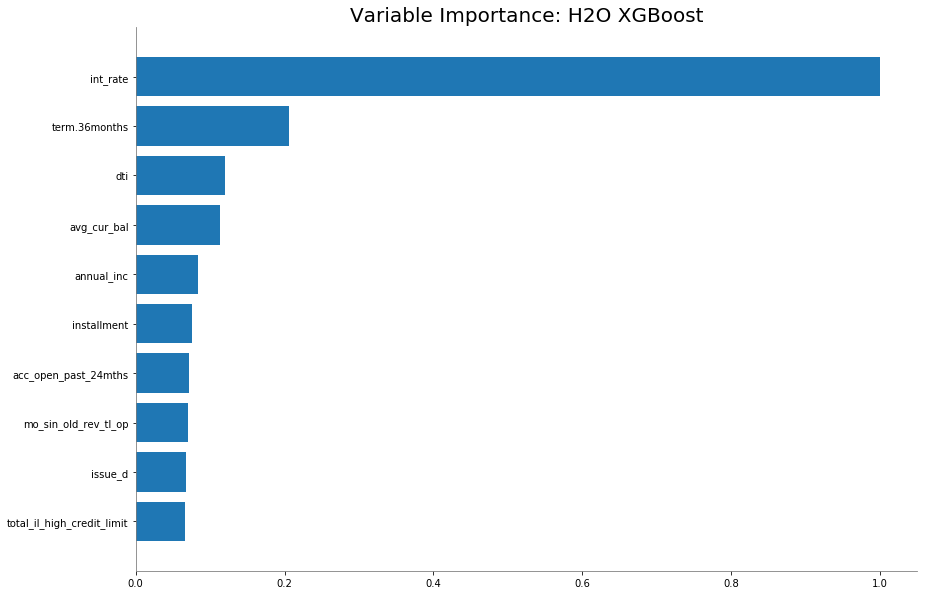

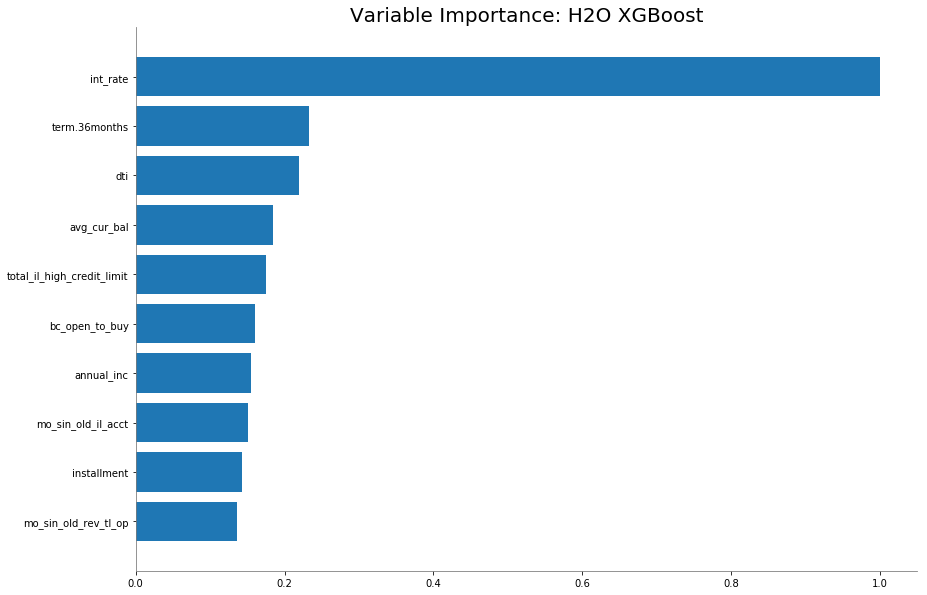

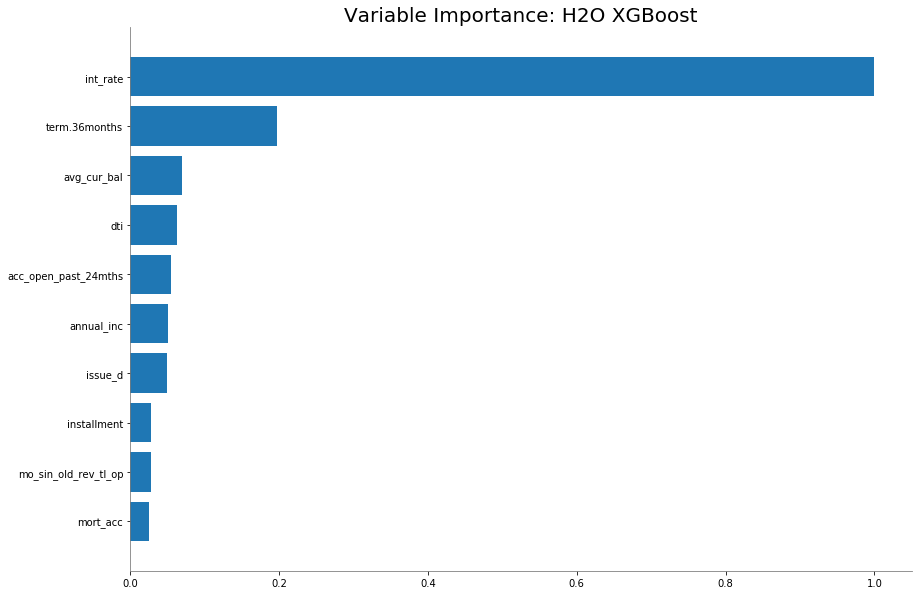

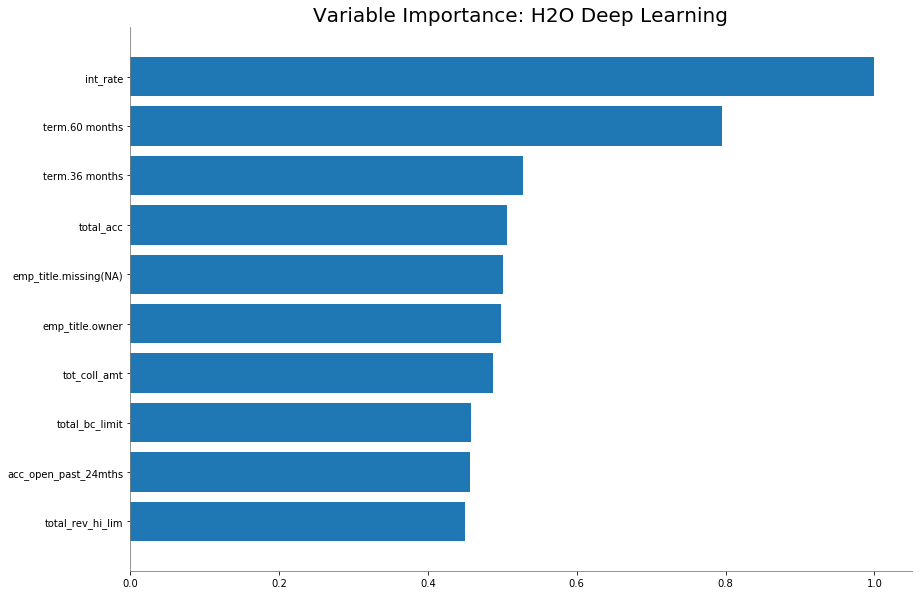

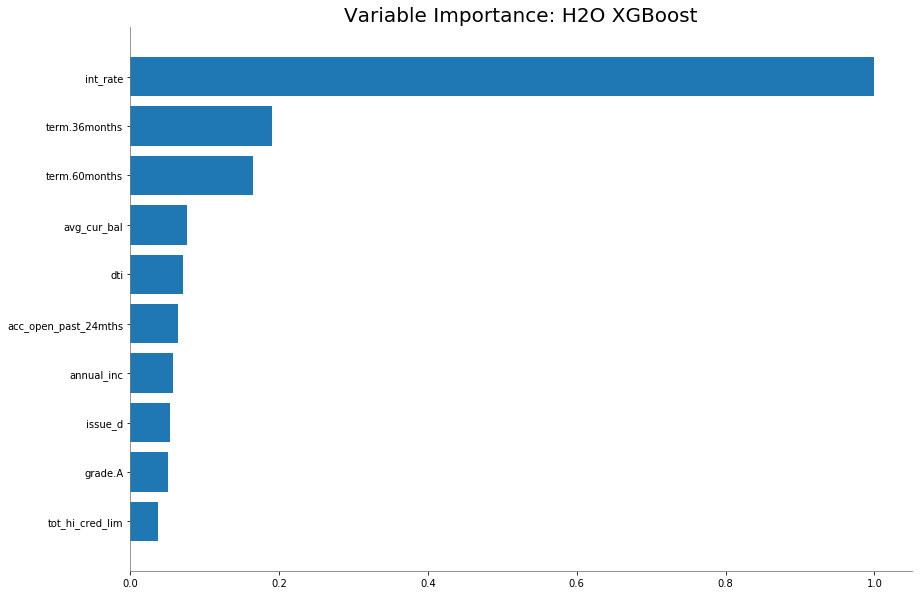

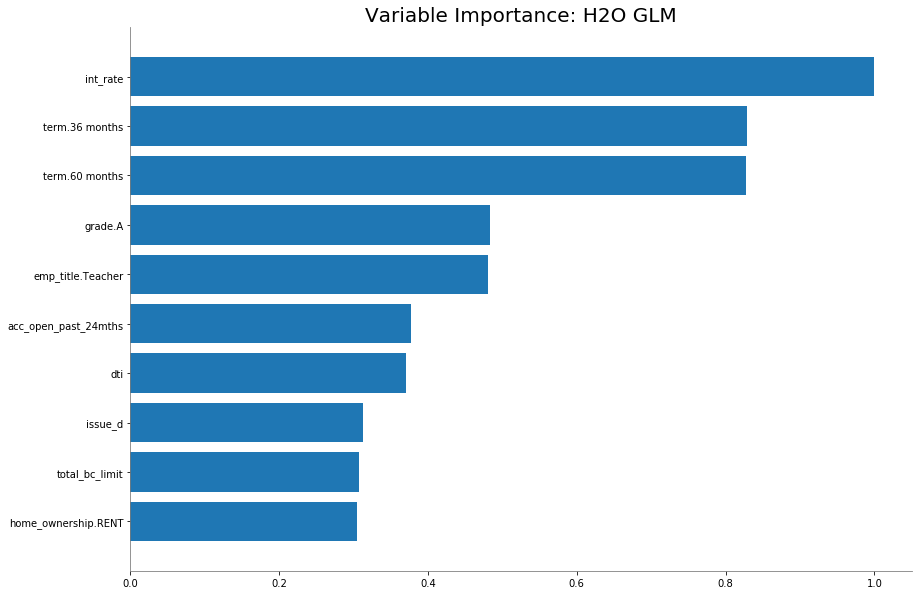

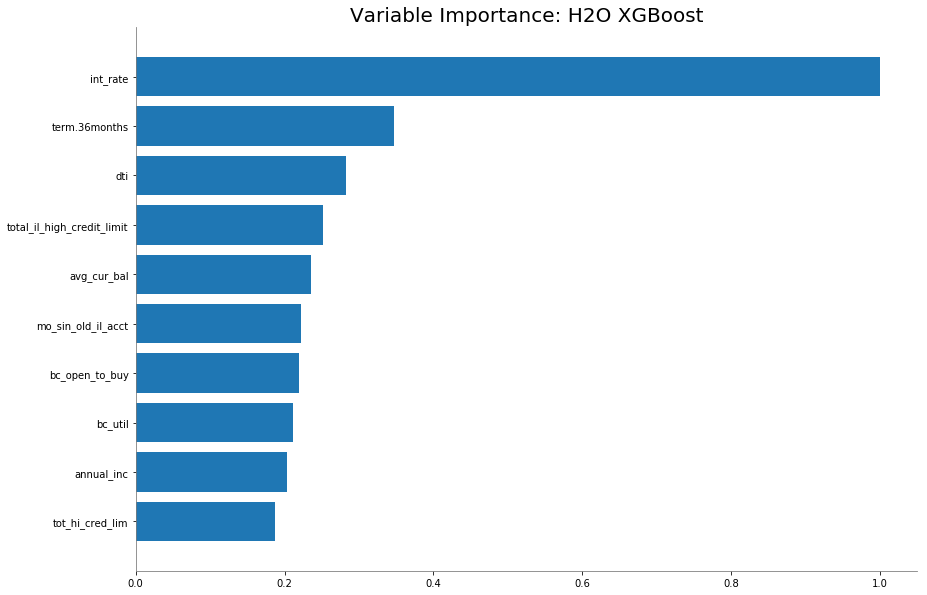

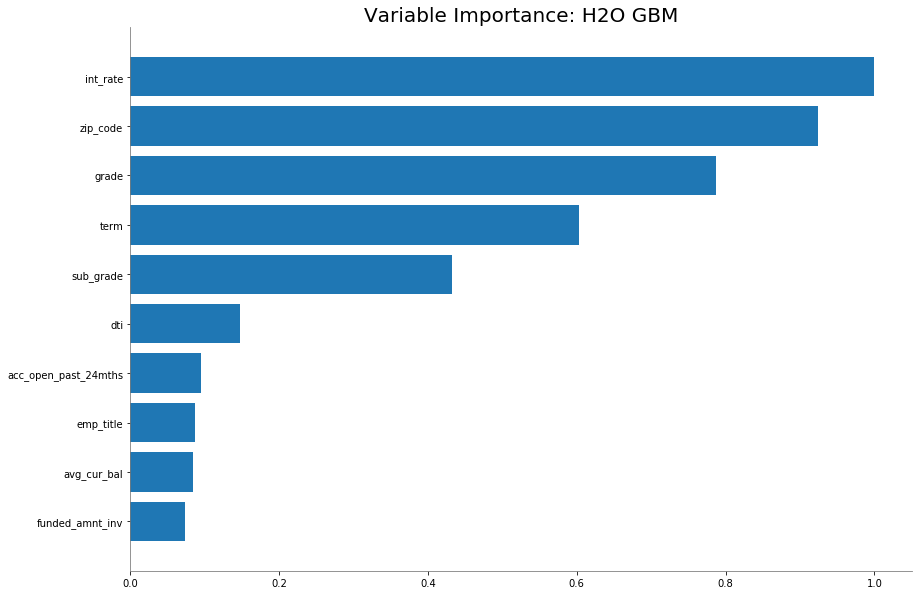

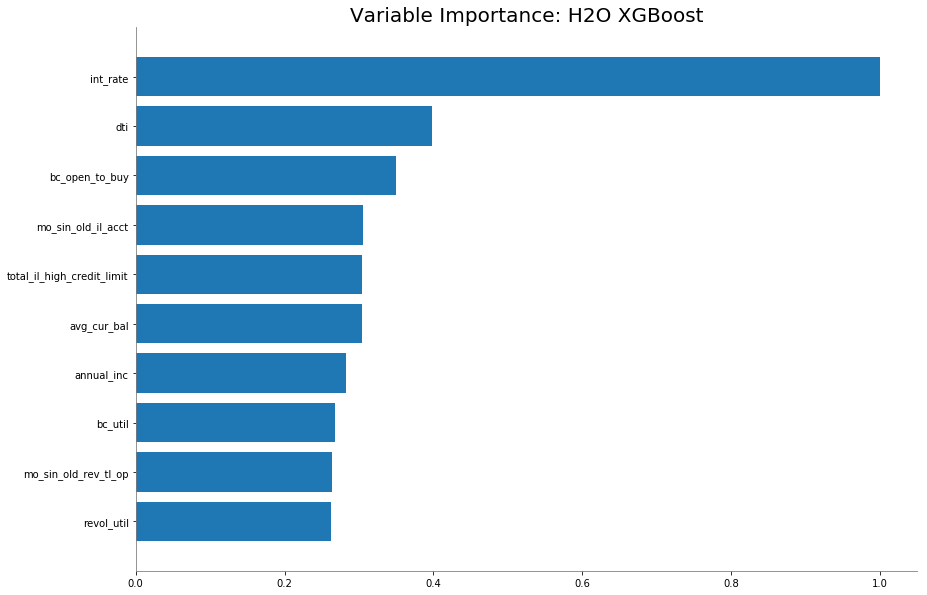

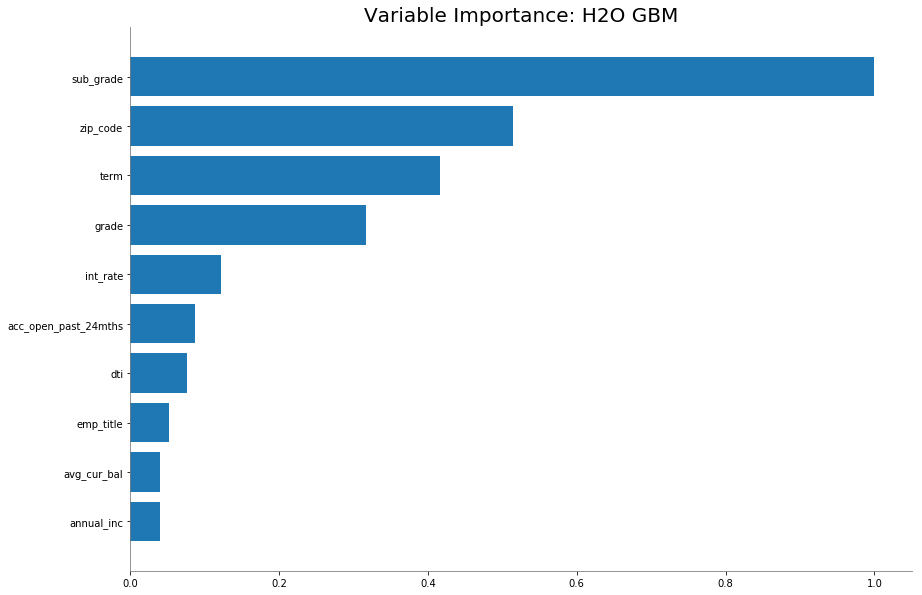

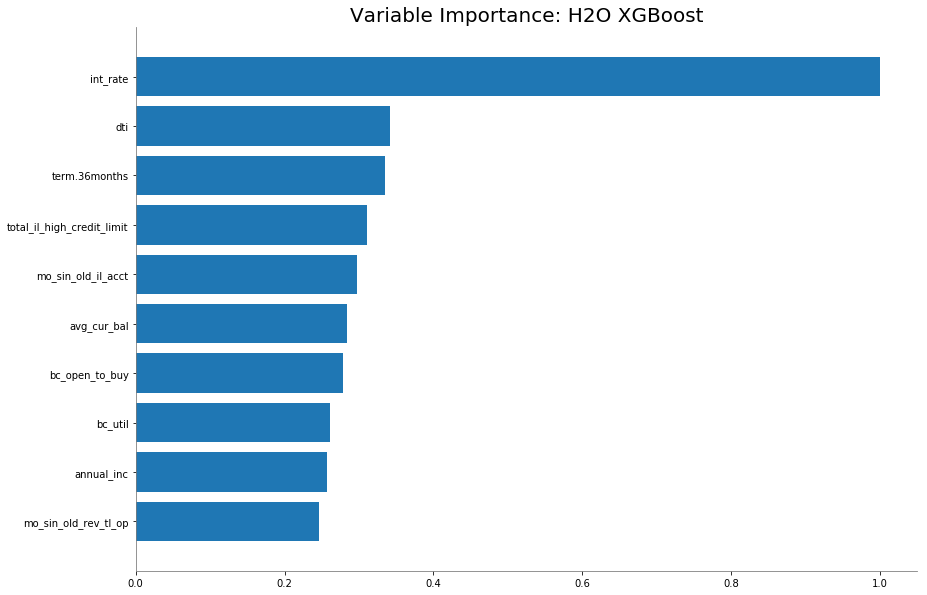

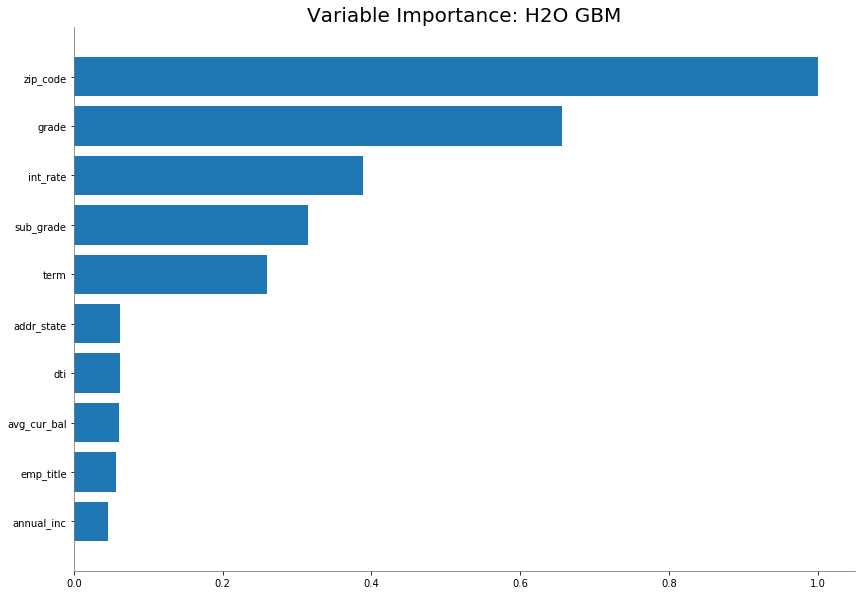

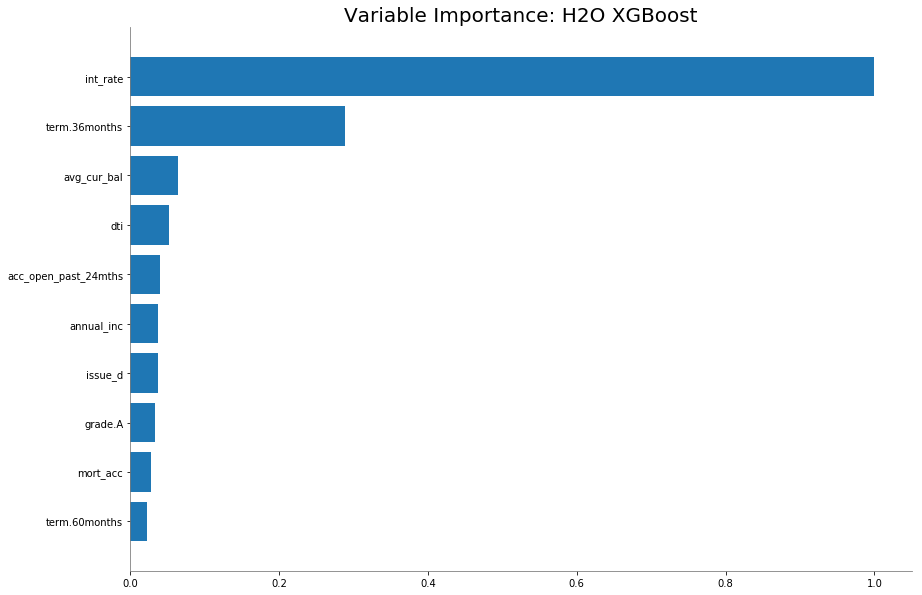

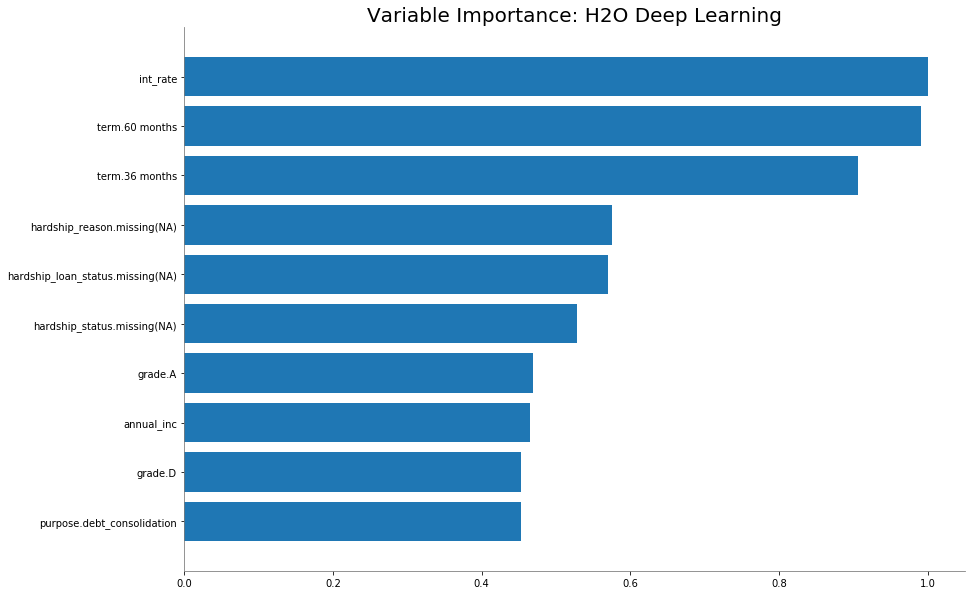

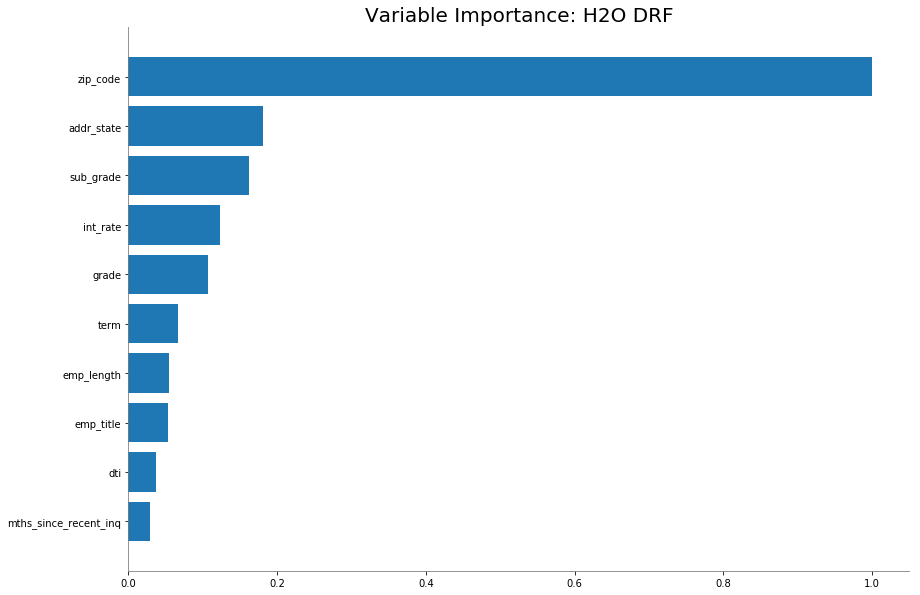

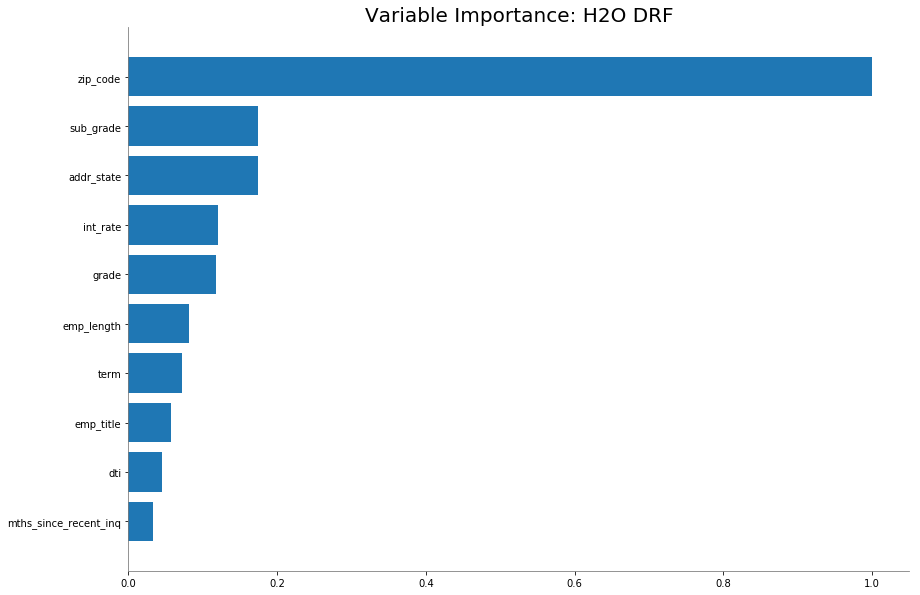

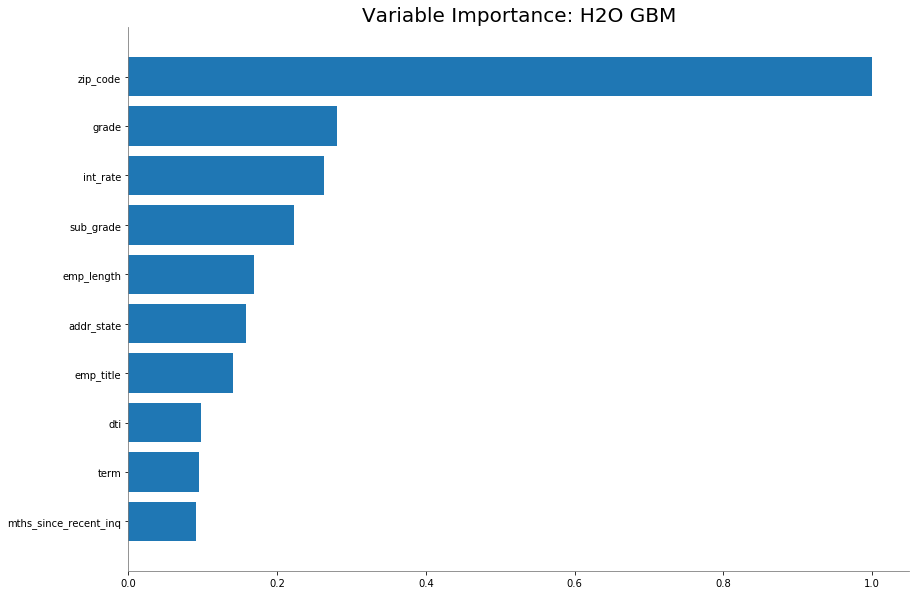

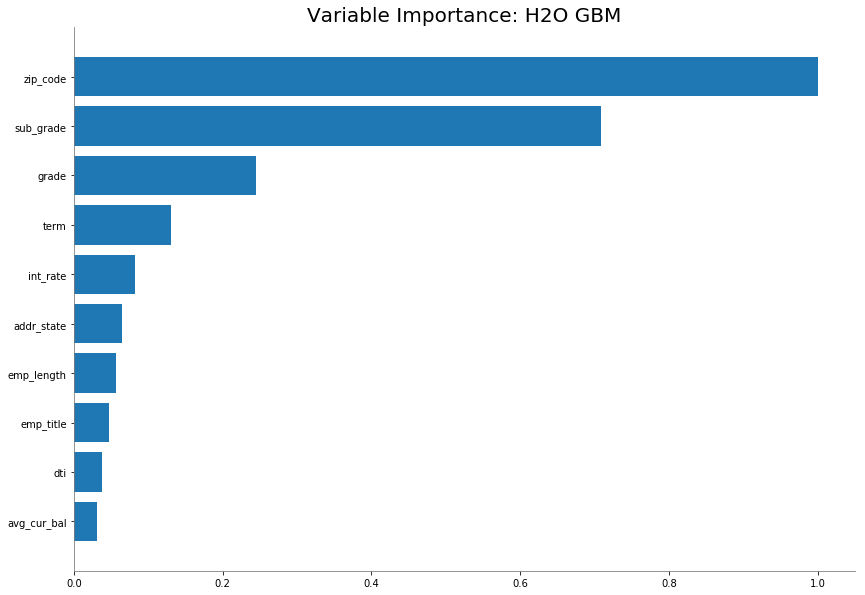

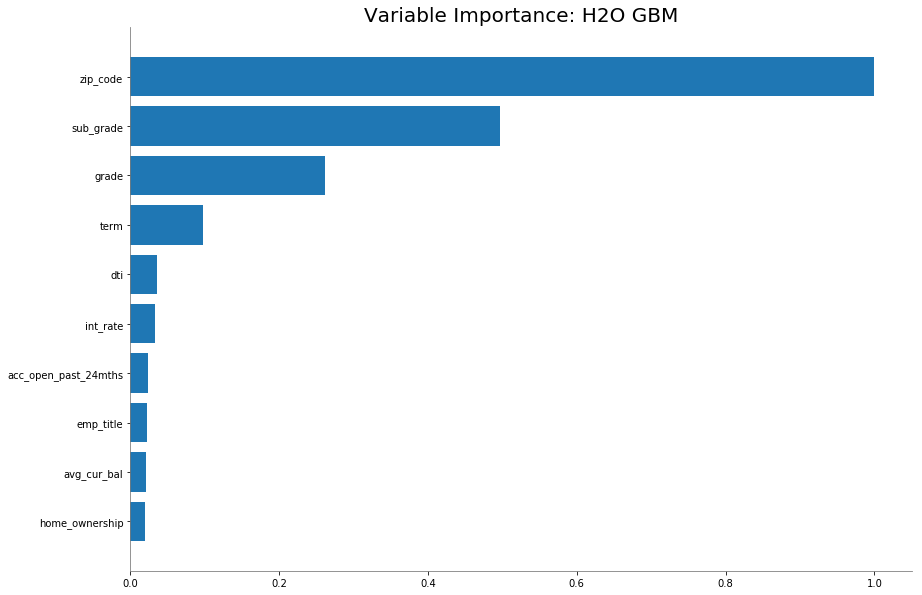

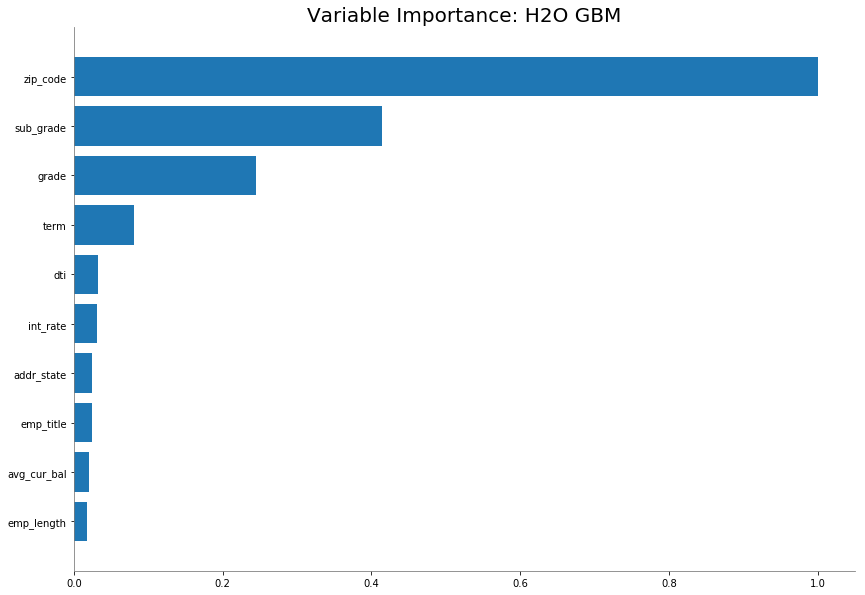

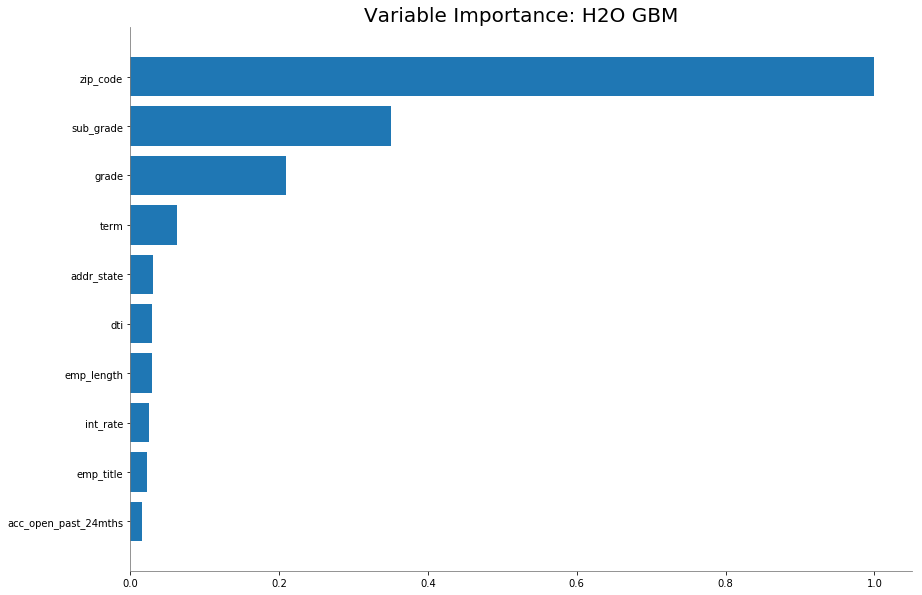

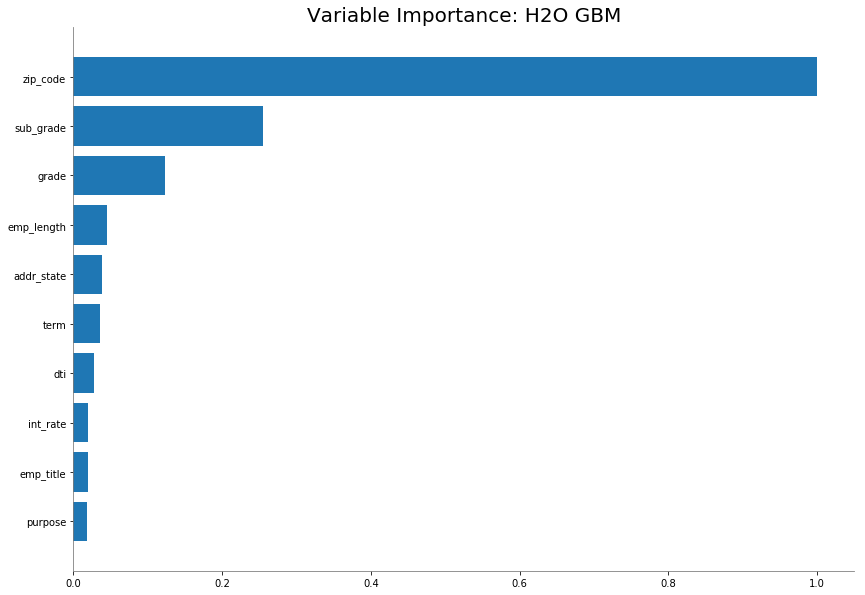

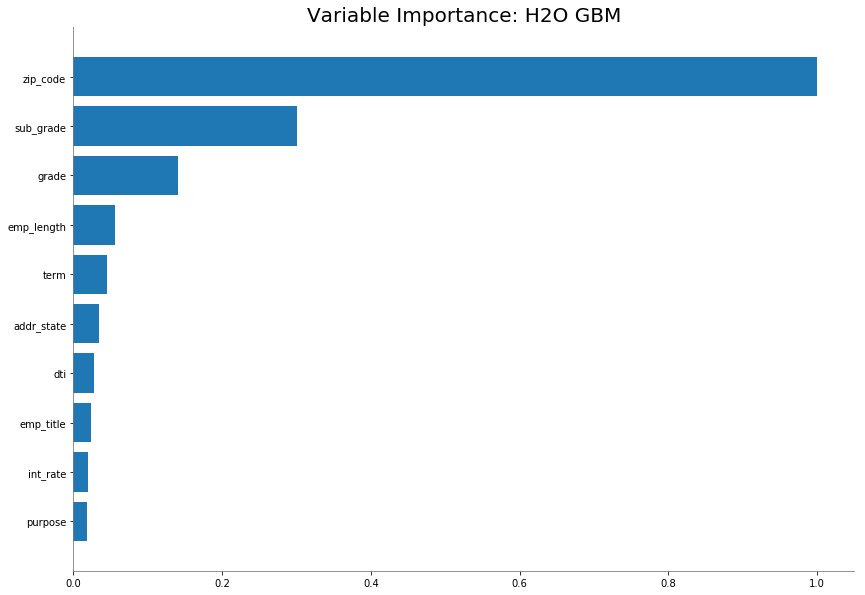

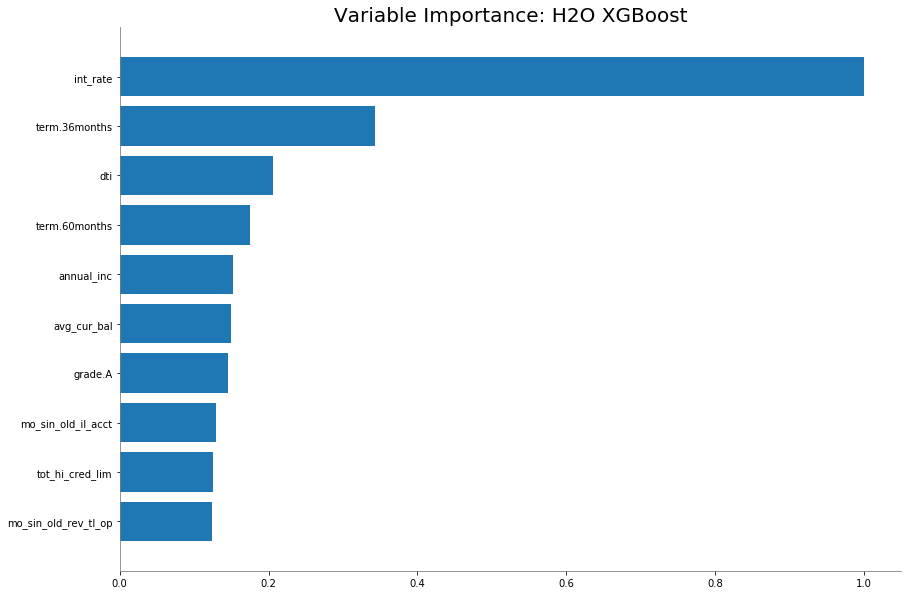

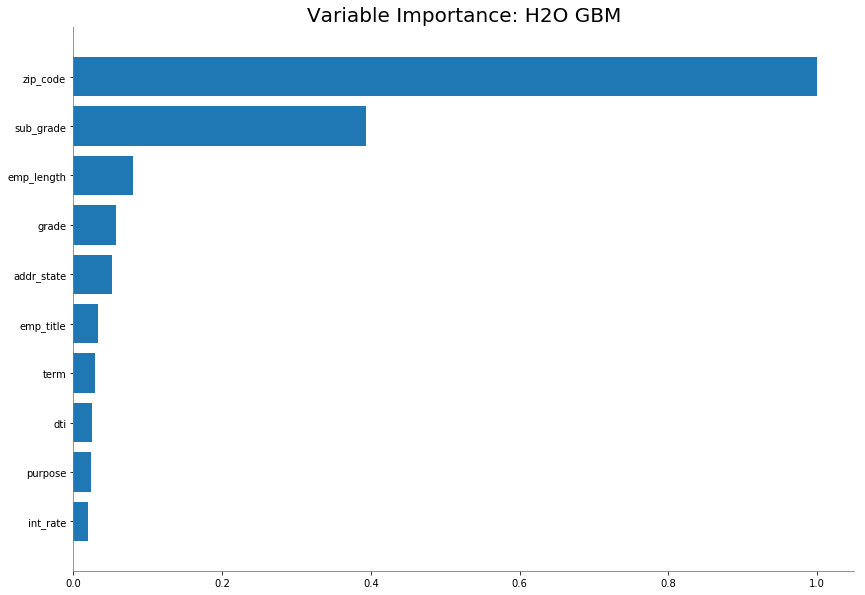

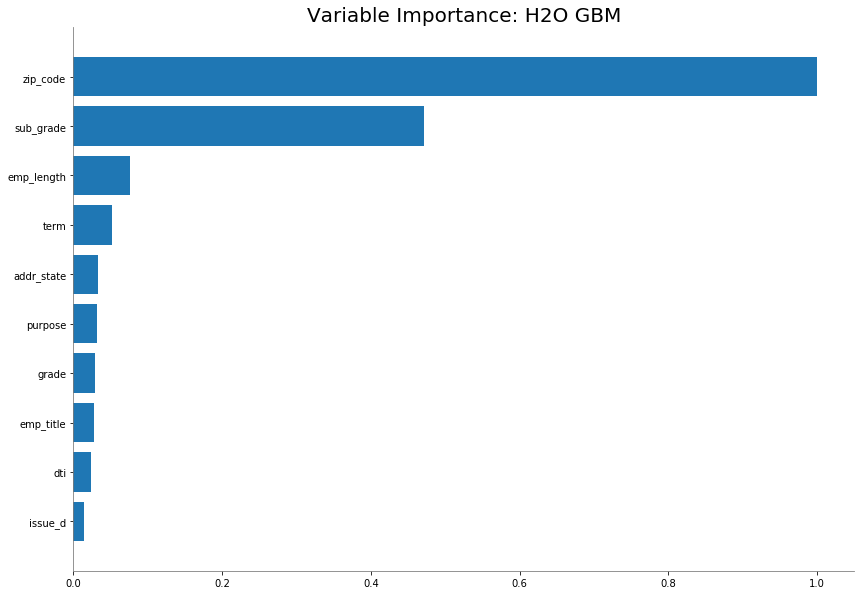

In [21]:
# Let's do variable importance for each one of the models in the LeaderBoard
# We can't do this for a StackedEnsemble, so will skip it

df = lb.as_data_frame()
for m in df['model_id'].tolist():
    if (m.find("StackedEnsemble") == -1):
        h2o.get_model(m).varimp_plot()
 

### Lets predict on the Test Data Set - using the AutoML leader 

In [22]:
test_pc = aml.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [23]:
# These scores were predicted by the stacked ensemble leader ...
test_pc

predict,Charged Off,Fully Paid
Fully Paid,0.408063,0.591937
Fully Paid,0.125824,0.874176
Fully Paid,0.0905784,0.909422
Fully Paid,0.0865747,0.913425
Fully Paid,0.29211,0.70789
Fully Paid,0.204198,0.795802
Fully Paid,0.210486,0.789514
Fully Paid,0.316671,0.683329
Fully Paid,0.103161,0.896839
Fully Paid,0.237937,0.762063


### AutoML Leader - Model Performance on the Test Data Set

In [24]:
aml.leader.model_performance(test_data=test,xval=False)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13516436711433857
RMSE: 0.36764706868726504
LogLoss: 0.4294704619987983
Null degrees of freedom: 44620
Residual degrees of freedom: 44609
Null deviance: 42669.25591871253
Residual deviance: 38326.80296969676
AIC: 38350.80296969676
AUC: 0.729166920376973
pr_auc: 0.914851552739563
Gini: 0.4583338407539459
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3370800172644464: 


,Charged Off,Fully Paid,Error,Rate
Charged Off,192.0,8040.0,0.9767,(8040.0/8232.0)
Fully Paid,108.0,36281.0,0.003,(108.0/36389.0)
Total,300.0,44321.0,0.1826,(8148.0/44621.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3370800,0.8990460,369.0
max f2,0.1879337,0.9567593,395.0
max f0point5,0.7171745,0.8639121,219.0
max accuracy,0.4349852,0.8182246,341.0
max precision,0.9386120,1.0,0.0
max recall,0.1879337,1.0,395.0
max specificity,0.9386120,1.0,0.0
max absolute_mcc,0.7896954,0.2768628,167.0
max min_per_class_accuracy,0.8266389,0.6683673,132.0
max mean_per_class_accuracy,0.8276445,0.6690590,131.0


Gains/Lift Table: Avg response rate: 81.55 %, avg score: 81.28 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100177,0.9351105,1.2125061,1.2125061,0.9888143,0.9367568,0.9888143,0.9367568,0.0121465,0.0121465,21.2506078,21.2506078
,2,0.0200130,0.9330618,1.2152247,1.2138639,0.9910314,0.9340177,0.9899216,0.9353888,0.0121465,0.0242931,21.5224701,21.3863867
,3,0.0300083,0.9313705,1.2097259,1.2124856,0.9865471,0.9321741,0.9887976,0.9343180,0.0120916,0.0363846,20.9725947,21.2485591
,4,0.0400036,0.9297625,1.1849816,1.2056134,0.9663677,0.9305613,0.9831933,0.9333794,0.0118442,0.0482289,18.4981553,20.5613433
,5,0.0500213,0.9282652,1.1850738,1.2015000,0.9664430,0.9289898,0.9798387,0.9325003,0.0118717,0.0601006,18.5073814,20.1499988
,6,0.1000202,0.9209130,1.1701601,1.1858335,0.9542806,0.9245529,0.9670625,0.9285275,0.0585067,0.1186073,17.0160056,18.5833533
,7,0.1500190,0.9138819,1.1624653,1.1780453,0.9480054,0.9173999,0.9607111,0.9248188,0.0581220,0.1767292,16.2465251,17.8045269
,8,0.2000179,0.9071098,1.1404801,1.1686550,0.9300762,0.9105164,0.9530532,0.9212436,0.0570227,0.2337520,14.0480092,16.8655027
,9,0.3000157,0.8923694,1.1162964,1.1512035,0.9103541,0.9000421,0.9388212,0.9141770,0.1116271,0.3453791,11.6296418,15.1203461
,10,0.4000134,0.8748209,1.0860668,1.1349202,0.8857015,0.8839408,0.9255420,0.9066184,0.1086042,0.4539833,8.6066825,13.4920215


### Summary of Results
The AUC on the test set was ~ 0.73, which is slightly better than the train AUC. 

The data was a snapshot on time where loans where running (some early stage and some late) and not necessarily "cohorts". In the data preparation phase, we also dropped lot of columns that was giving away the outcome. The models built are still very useful to understand the drivers behind the outcome. How to improve the accuracy ? See Next Steps.

### Next Steps
H2O3 AutoML can help you build models really quickly and understand the variable importances with very little effort. Recall, we didn't do any feature engineering (like one-hot-encoding etc.,) to the input data! In the next blog posts, we will explore how to do the following, in addition to Automatic Machine Learning:
- Automatic Feature Engineering
- Machine Learning Interpretability etc.,

with H2O's commercial product Driverless AI ...
